**Task 1**: Use pre-trained Xception to classify an image, e.g. the elephant or other images of your choice (Hint: the input image needs to be resized to 299x299)

In [0]:
# import Keras & Tensorflow
import tensorflow as tf
from tensorflow import keras
# Load pre-trained Xception
model = keras.applications.xception.Xception(weights="imagenet")
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
# Load in image and perform classification
import keras.preprocessing.image as image
img = image.load_img("/content/gdrive/My Drive/elephant.jpg", target_size=(299, 299)) # the image is in the root of Google Drive
# convert the image pixels to a numpy array
img = image.img_to_array(img)
# reshape data for the model
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
# prepare the image for the model
img = keras.applications.xception.preprocess_input(img)
Y_prob = model.predict(img)
# Show top K prediction
top_K = keras.applications.xception.decode_predictions(Y_prob, top=3)
for class_id, name, y_proba in top_K[0]:
  print("class_id:", class_id, "name:", name, " ", y_proba*100, "%")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
40960/35363 [==================================] - 0s 0us/step
class_id: n02504458 name: African_elephant   79.48312759399414 %
class_id: n02504013 name: Indian_elephant   7.916814833879471 %
class_id: n01871265 name: tusker   5.354675650596619 %


**Task 2**: Build a denoise autoencoder for MNIST Fashion Dataset, using Dropout. Show its reconstruction results.


4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 176us/sample - loss: 0.3452 - val_loss: 0.3165
Epoch 2/10
54000/54000 [==============================] - 8s 156us/sample - loss: 0.3152 - val_loss: 0.3126
Epoch 3/10
54000/54000 [==============================] - 8s 154us/sample - loss: 0.3089 - val_loss: 0.3035
Epoch 4/10
54000/54000 [==============================] - 8s 155us/sample - loss: 0.3054 - val_loss: 0.3014
Epoch 5/10
54000/54000 [==============================] - 8s 154us/sample - loss: 0.3033 - val_loss: 0.2999
Epoch 6/10
54000/54000 [==============================] - 8s 153us/sample - loss: 0.3016 - val_loss: 0.2977
Epoch 7/10
54000/54000 [==============================] - 8s 155us/sample - loss: 0.3002 - val_loss: 0.2969
Epoch 8/10
54000/54000 [==============

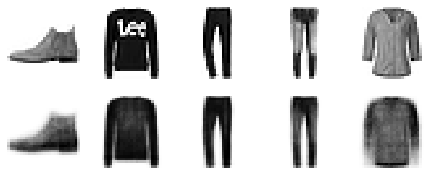

In [0]:
# Autoencoder example using fashion MNIST
# Load image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data preparation:
#   Map intensities from [0--255] to 0.0--1.0
x_train = x_train / 255.0
x_test = x_test / 255.0
encoder = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(100, activation="selu"),
  keras.layers.Dense(30, activation="selu")
])
decoder = keras.models.Sequential([
  keras.layers.Dense(100, activation="selu", input_shape=[30]),
  keras.layers.Dense(28*28, activation="sigmoid"),
  keras.layers.Reshape([28, 28])
])
ae = keras.models.Sequential([encoder, decoder])
ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history=ae.fit(x_train, x_train, epochs=10, validation_split=0.1)

# Visualise results
import matplotlib.pyplot as plt
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

n_images = 5
reconstructions = ae.predict(x_test[:n_images])
fig=plt.figure(figsize=(n_images*1.5, 3))
for idx in range(n_images):
  plt.subplot(2, n_images, 1+idx)
  plot_image(x_test[idx])
  plt.subplot(2, n_images, 1+n_images+idx)
  plot_image(reconstructions[idx])

**Task 3**: Test the capability of denoising for removing noise of input images. Use the given code to add noise to the test images.

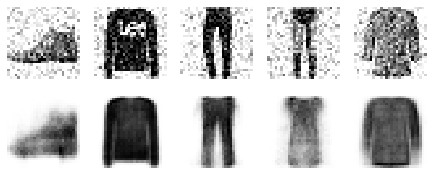

In [0]:
import numpy as np
def add_gaussian_noise(image):
    # image must be scaled in [0, 1]
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random_normal(shape=tf.shape(image), mean=0.0, stddev=(50)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return noise_img.eval(session=tf.compat.v1.Session())

n_images = 5
test = np.zeros((n_images, 28, 28))
for idx in range(n_images):
  test[idx] = add_gaussian_noise(x_test[idx])

reconstructions = ae.predict(test[:n_images])
fig=plt.figure(figsize=(n_images*1.5, 3))
for idx in range(n_images):
  plt.subplot(2, n_images, 1+idx)
  plot_image(test[idx])
  plt.subplot(2, n_images, 1+n_images+idx)
  plot_image(reconstructions[idx])

**Task 4**: Build an autoencoder for MNIST Fashion Dataset. As they are images, it is possible to use convolutional layers (Conv2D) followed by pooling (MaxPool2D). For the decoder, uses Conv2DTranspose to achieve convolution and upsampling.

Hint: the last layer uses Sigmoid activation to map the output to (0, 1). 
Hint: Use a dense layer to map convolutional layer output to a latent vector representation.

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.3113 - val_loss: 0.2899
Epoch 2/10
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.2846 - val_loss: 0.2850
Epoch 3/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2803 - val_loss: 0.2830
Epoch 4/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2781 - val_loss: 0.2831
Epoch 5/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2768 - val_loss: 0.2783
Epoch 6/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2758 - val_loss: 0.2781
Epoch 7/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2750 - val_loss: 0.2772
Epoch 8/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2744 - val_loss: 0.2769
Epoch 9/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.2740 - val_l

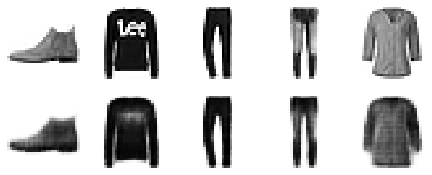

In [0]:
# Autoencoder example using fashion MNIST
# Load image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data preparation:
#   Map intensities from [0--255] to 0.0--1.0
x_train = x_train / 255.0
x_test = x_test / 255.0
encoder = keras.models.Sequential([
  keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
  keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(30, activation="selu")
])
decoder = keras.models.Sequential([
  keras.layers.Dense(32*7*7, input_shape=[30], activation="selu"),
  keras.layers.Reshape([7, 7, 32]),
  keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="selu"),
  keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid"),
  keras.layers.Reshape([28, 28])
])
ae = keras.models.Sequential([encoder, decoder])
ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history=ae.fit(x_train, x_train, epochs=10, validation_split=0.1)

# Visualise results
import matplotlib.pyplot as plt
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

n_images = 5
reconstructions = ae.predict(x_test[:n_images])
fig=plt.figure(figsize=(n_images*1.5, 3))
for idx in range(n_images):
  plt.subplot(2, n_images, 1+idx)
  plot_image(x_test[idx])
  plt.subplot(2, n_images, 1+n_images+idx)
  plot_image(reconstructions[idx])